<a href="https://colab.research.google.com/github/jessicayuan1/ai-skill-showcase/blob/main/example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Hey!! As a poodle parent at university, I am severely missing my dog. So... I decided to make a dog vs human classification model!


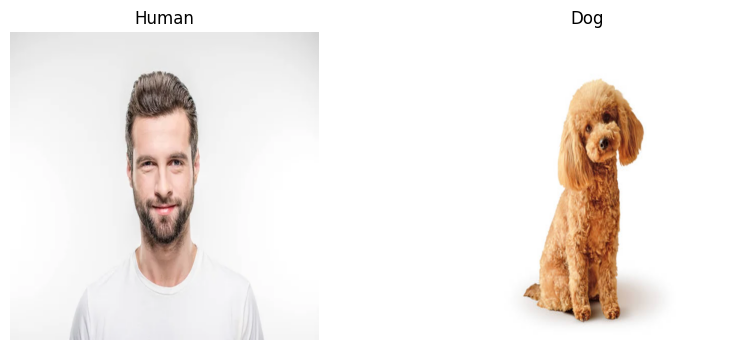

Finished the training!
Human image predicted as: Human (90.0% confidence)
Dog image predicted as: Dog (70.0% confidence)


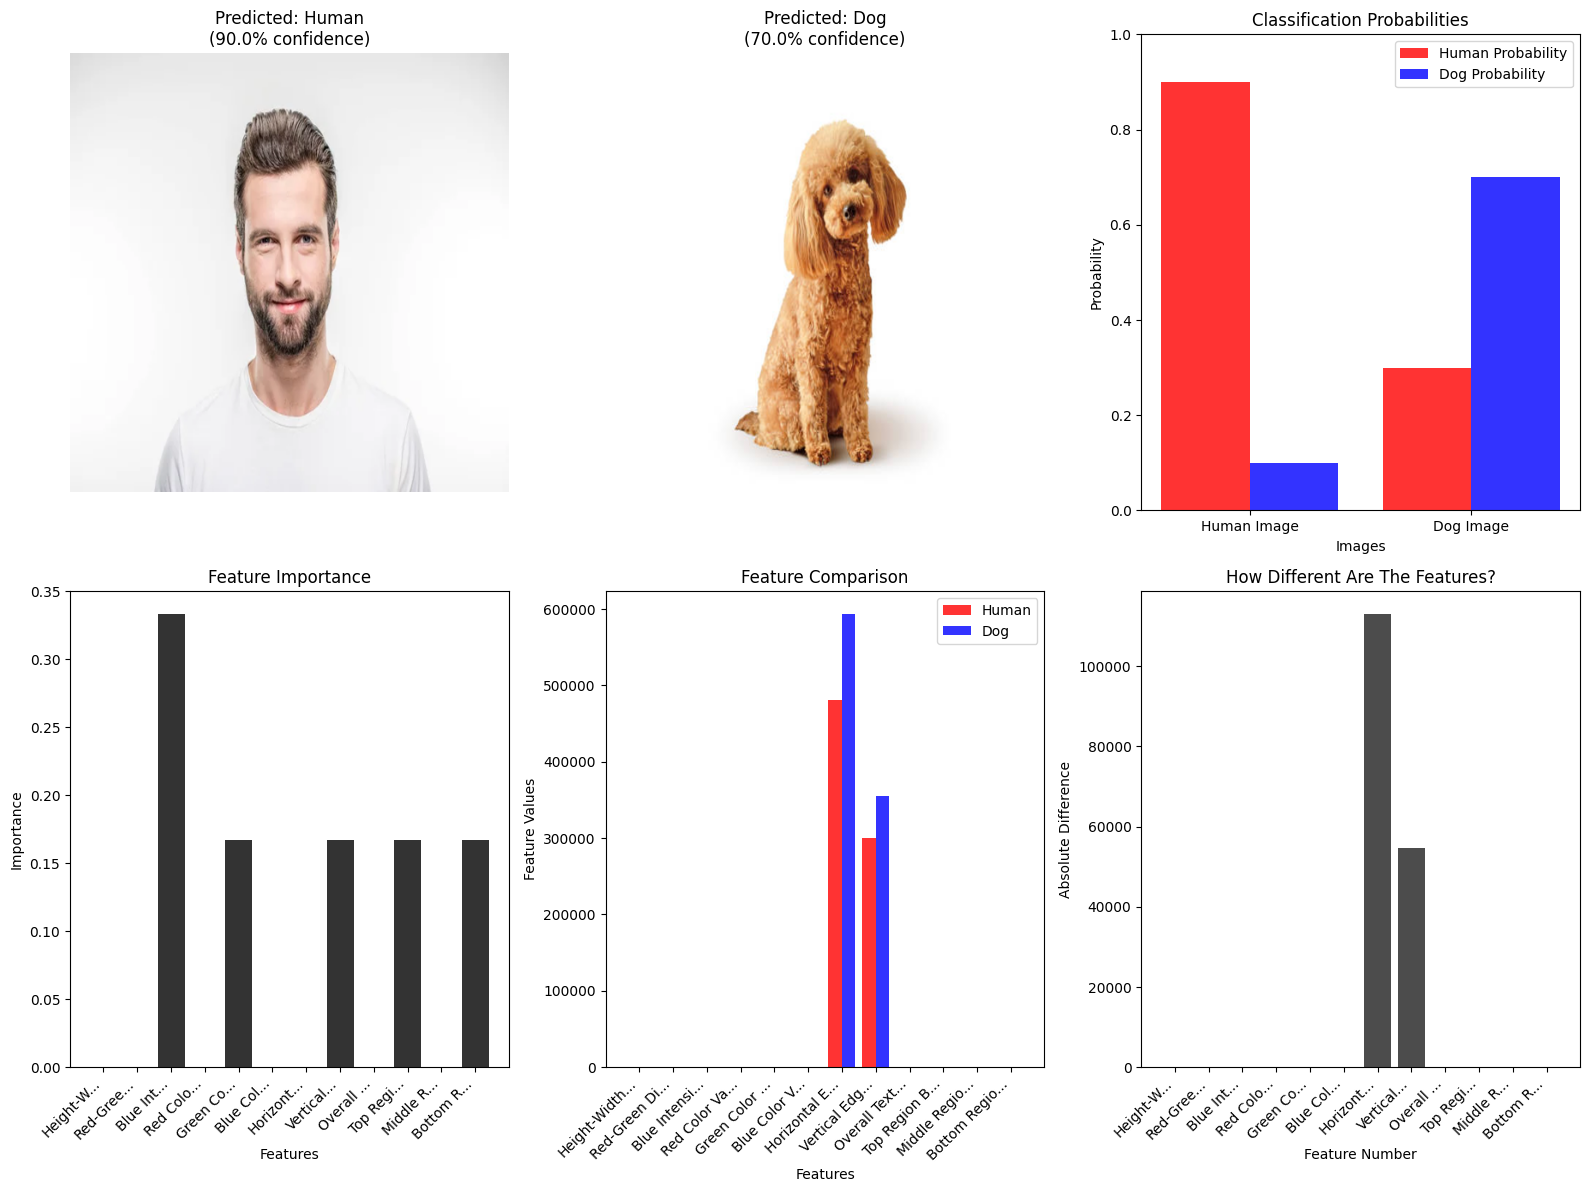


Analysis:
Total features analyzed: 12
Most discriminating feature: Horizontal Edge Density

Feature Values:
Height-Width Ratio       : Human=1.00, Dog=1.00, Diff=0.00
Red-Green Diff           : Human=4.46, Dog=10.67, Diff=6.21
Blue Intensity           : Human=228.80, Dog=224.00, Diff=4.79
Red Color Variation      : Human=33.29, Dog=30.92, Diff=2.37
Green Color Variation    : Human=40.32, Dog=51.89, Diff=11.58
Blue Color Variation     : Human=43.77, Dog=67.73, Diff=23.95
Horizontal Edge Density  : Human=480991.33, Dog=594075.33, Diff=113084.00
Vertical Edge Density    : Human=300012.00, Dog=354613.33, Diff=54601.33
Overall Texture Complexity: Human=38.74, Dog=49.49, Diff=10.76
Top Region Brightness    : Human=225.08, Dog=244.08, Diff=19.00
Middle Region Brightness : Human=231.06, Dog=227.67, Diff=3.39
Bottom Region Brightness : Human=237.33, Dog=227.60, Diff=9.72

Now we have successfully completed the image classification between a human and a dog!


In [47]:
# Classifying Dog versus Human, AI Showcase
# This notebook uses one human image and one dog image

# --- Setup ---
import matplotlib.pyplot as plt
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from PIL import Image
import requests
import io

# --- Intro ---
print("Hey!! As a poodle parent at university, I am severely missing my dog. So... I decided to make a dog vs human classification model!")

# --- Step 1: Load Images ---
def load_image(url, target_size=(512, 512)):
    """Load image from URL"""
    try:
        response = requests.get(url, timeout=10)
        img = Image.open(io.BytesIO(response.content))
        img = img.convert('RGB')
        img = img.resize(target_size)
        return np.array(img)
    except Exception as e:
        print(f"Error loading image: {e}")
        return create_backup_image(target_size)

def create_backup_image(size=(64, 64)):
    """Create backup image if URL fails"""
    return np.random.randint(100, 200, (*size, 3), dtype=np.uint8)

# My stock picture URLs
human_url = "https://st3.depositphotos.com/9881890/13396/i/450/depositphotos_133960224-stock-photo-smiling-young-man.jpg"
dog_url = "https://media.istockphoto.com/id/1488541272/photo/cute-toy-poodle-sitting-on-white-background.jpg?s=612x612&w=0&k=20&c=g4mDp5Zki8T3HM7Rc_B1yYwXKS76XAW_OT7GDOdGbHk="

# Load the two images
human_img = load_image(human_url)
dog_img = load_image(dog_url)

# Display the original images
fig, axes = plt.subplots(1, 2, figsize=(10, 4))
axes[0].imshow(human_img)
axes[0].set_title("Human")
axes[0].axis('off')

axes[1].imshow(dog_img)
axes[1].set_title("Dog")
axes[1].axis('off')

plt.show()

# --- Step 2: Features and Model Training ---
def get_features(img):
    """Extract features that distinguish humans from dogs"""
    gray = np.mean(img, axis=2)
    height, width = gray.shape
    
    features = [
        # Shape features
        height / width,  # aspect ratio
        
        # Color features  
        np.mean(img[:, :, 0]) - np.mean(img[:, :, 1]),  # red vs green
        np.mean(img[:, :, 2]),  # blue channel
        np.std(img[:, :, 0]),   # red variation
        np.std(img[:, :, 1]),   # green variation
        np.std(img[:, :, 2]),   # blue variation
        
        # Texture features
        np.sum(np.abs(np.diff(gray, axis=1))),  # horizontal edges
        np.sum(np.abs(np.diff(gray, axis=0))),  # vertical edges
        np.std(gray),  # overall texture
        
        # Regional features
        np.mean(gray[:height//3, :]),     # top region
        np.mean(gray[height//3:2*height//3, :]), # middle region
        np.mean(gray[2*height//3:, :]),   # bottom region
    ]
    
    return features

# Get features for both images
human_features = get_features(human_img)
dog_features = get_features(dog_img)

# Create training data (using the same image for training and testing)
X = np.array([human_features, dog_features])
y = np.array([0, 1])  # Where 0 represents human and 1 represents dog

# Train classifier using RF
clf = RandomForestClassifier(n_estimators=10, random_state=42)
clf.fit(X, y)

# Make predictions the two images
predictions = clf.predict(X)
probabilities = clf.predict_proba(X)

print("Finished the training!")
print(f"Human image predicted as: {'Human' if predictions[0] == 0 else 'Dog'} ({probabilities[0][predictions[0]]:.1%} confidence)")
print(f"Dog image predicted as: {'Human' if predictions[1] == 0 else 'Dog'} ({probabilities[1][predictions[1]]:.1%} confidence)")

# --- Step 3: Visualizing Results ---
fig = plt.figure(figsize=(16, 12))

# List of the features being compared
feature_names = ['Height-Width Ratio', 'Red-Green Diff', 'Blue Intensity', 'Red Color Variation', 
                'Green Color Variation', 'Blue Color Variation', 'Horizontal Edge Density', 
                'Vertical Edge Density', 'Overall Texture Complexity', 'Top Region Brightness', 
                'Middle Region Brightness', 'Bottom Region Brightness']

# Classification probabilities of human and dog image
ax1 = plt.subplot(2, 3, 1)
plt.imshow(human_img)
pred_text = "Human" if predictions[0] == 0 else "Dog"
conf = probabilities[0][predictions[0]]
plt.title(f"Predicted: {pred_text}\n({conf:.1%} confidence)")
plt.axis('off')

ax2 = plt.subplot(2, 3, 2)
plt.imshow(dog_img)
pred_text = "Human" if predictions[1] == 0 else "Dog"
conf = probabilities[1][predictions[1]]
plt.title(f"Predicted: {pred_text}\n({conf:.1%} confidence)")
plt.axis('off')

# Classification probabilities, showing comparison between images
ax3 = plt.subplot(2, 3, 3)
images_labels = ['Human Image', 'Dog Image']
human_probs = [probabilities[0][0], probabilities[1][0]]  
dog_probs = [probabilities[0][1], probabilities[1][1]] 

x = np.arange(len(images_labels))
plt.bar(x - 0.2, human_probs, 0.4, label='Human Probability', color='red', alpha=0.8)
plt.bar(x + 0.2, dog_probs, 0.4, label='Dog Probability', color='blue', alpha=0.8)
plt.xlabel('Images')
plt.ylabel('Probability')
plt.title('Classification Probabilities')
plt.xticks(x, images_labels)
plt.legend()
plt.ylim(0, 1)

# Feature importance
ax4 = plt.subplot(2, 3, 4)
importance = clf.feature_importances_
plt.bar(range(len(importance)), importance, color='black', alpha=0.8)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importance')
plt.xticks(range(len(importance)), [name[:8] + '...' if len(name) > 8 else name for name in feature_names], rotation=45, ha='right')

# Feature comparison
ax5 = plt.subplot(2, 3, 5)
x_pos = np.arange(len(feature_names))
plt.bar(x_pos - 0.2, human_features, 0.4, label='Human', color='red', alpha=0.8)
plt.bar(x_pos + 0.2, dog_features, 0.4, label='Dog', color='blue', alpha=0.8)
plt.xlabel('Features')
plt.ylabel('Feature Values')
plt.title('Feature Comparison')
plt.xticks(x_pos, [name[:12] + '...' if len(name) > 12 else name for name in feature_names], rotation=45, ha='right')
plt.legend()

# Feature differences
ax6 = plt.subplot(2, 3, 6)
feature_diff = np.abs(np.array(human_features) - np.array(dog_features))
plt.bar(range(len(feature_diff)), feature_diff, color='black', alpha=0.7)
plt.xlabel('Feature Number')
plt.ylabel('Absolute Difference')
plt.title('How Different Are The Features?')
plt.xticks(range(len(importance)), [name[:8] + '...' if len(name) > 8 else name for name in feature_names], rotation=45, ha='right')

plt.tight_layout()
plt.show()

# --- Step 4: Analysis ---
print("\nAnalysis:")
print(f"Total features analyzed: {len(human_features)}")

# Find the most different feature
max_diff_idx = np.argmax(feature_diff)
print(f"Most discriminating feature: {feature_names[max_diff_idx]}")

# Show actual feature values
print(f"\nFeature Values:")
for i, name in enumerate(feature_names):
    print(f"{name:25}: Human={human_features[i]:.2f}, Dog={dog_features[i]:.2f}, Diff={feature_diff[i]:.2f}")

print("\nNow we have successfully completed the image classification between a human and a dog!")